Данные взяты с сайта [rp5.ru/Архив\_погоды\_в\_Москве\_(ВДНХ)](https://rp5.ru/%D0%90%D1%80%D1%85%D0%B8%D0%B2_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B5_(%D0%92%D0%94%D0%9D%D0%A5))

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import autocorrelation_plot

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [2]:
os.listdir()

['.ipynb_checkpoints', 'IPG2211A2N.xls', 'День 2.ipynb', 'Мск_5лет.xls']

In [50]:
data = pd.read_excel('Мск_5лет.xls', skiprows=6)[::-1]

In [52]:
data

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
17646,01.01.2015 00:00,-6.6,743.2,758.4,-0.7,93.0,"Ветер, дующий с западо-юго-запада",2,NaN,NaN,...,NaN,NaN,NaN,-7.5,NaN,NaN,NaN,NaN,NaN,NaN
17645,01.01.2015 01:00,-6.2,742.9,758.0,-0.7,92.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,...,NaN,NaN,NaN,-7.3,NaN,NaN,NaN,NaN,NaN,NaN
17644,01.01.2015 02:00,-5.9,742.9,758.0,-0.5,93.0,"Ветер, дующий с запада",1,NaN,NaN,...,NaN,NaN,NaN,-6.9,NaN,NaN,NaN,NaN,NaN,NaN
17643,01.01.2015 03:00,-5.5,742.7,757.8,-0.5,92.0,"Ветер, дующий с запада",2,NaN,NaN,...,NaN,NaN,NaN,-6.6,NaN,NaN,NaN,NaN,NaN,NaN
17642,01.01.2015 04:00,-5.1,742.7,757.8,-0.2,94.0,"Ветер, дующий с запада",1,NaN,NaN,...,NaN,NaN,NaN,-5.9,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,01.01.2020 09:00,0.0,739.0,753.7,3.6,85.0,"Ветер, дующий с северо-северо-запада",3,NaN,10.0,...,NaN,NaN,10.0,-2.3,0.9,12.0,NaN,NaN,Ровный слой слежавшегося или мокрого снега пок...,1
3,01.01.2020 12:00,-2.0,742.4,757.3,3.4,66.0,"Ветер, дующий с севера",3,NaN,11.0,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-7.5,NaN,NaN,NaN,NaN,NaN,NaN
2,01.01.2020 15:00,-2.3,743.8,758.8,1.4,71.0,"Ветер, дующий с северо-северо-запада",2,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-6.9,NaN,NaN,NaN,NaN,NaN,NaN
1,01.01.2020 18:00,-3.0,745.2,760.2,1.4,77.0,"Ветер, дующий с западо-северо-запада",1,NaN,NaN,...,NaN,NaN,NaN,-6.5,Следы осадков,12.0,NaN,NaN,NaN,NaN


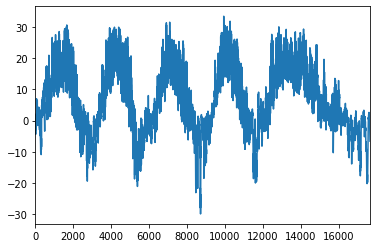

In [53]:
data['T'].plot()

In [54]:
data.index

RangeIndex(start=17646, stop=-1, step=-1)

In [55]:
# Оставим только полдень

In [56]:
data.index = pd.to_datetime(data['Местное время в Москве (ВДНХ)'], format='%d.%m.%Y %H:%M')

In [57]:
mask = data.index.hour == 12

In [58]:
data = data[mask]

In [59]:
data

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
Местное время в Москве (ВДНХ),,,,,,,,,,,,,,,,,,,,,
2015-01-01 12:00:00,01.01.2015 12:00,-1.5,743.6,758.5,0.2,96.0,"Ветер, дующий с западо-юго-запада",1,NaN,NaN,...,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",4.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02 12:00:00,02.01.2015 12:00,1.5,737.6,752.2,-0.5,97.0,"Ветер, дующий с запада",2,NaN,NaN,...,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03 12:00:00,03.01.2015 12:00,2.4,726.1,740.4,0.6,89.0,"Ветер, дующий с запада",2,NaN,NaN,...,NaN,NaN,4.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04 12:00:00,04.01.2015 12:00,0.8,722.2,736.5,0.2,93.0,"Ветер, дующий с западо-юго-запада",2,NaN,NaN,...,NaN,NaN,4.0,-0.2,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05 12:00:00,05.01.2015 12:00,-8.5,733.3,748.4,1.2,79.0,"Ветер, дующий с северо-запада",3,NaN,NaN,...,"Высококучевые, просвечивающие или плотные в дв...",NaN,4.0,-11.5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-28 12:00:00,28.12.2019 12:00,-0.7,751.6,766.6,1.5,91.0,"Ветер, дующий с северо-востока",2,NaN,NaN,...,NaN,NaN,4.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29 12:00:00,29.12.2019 12:00,-3.6,759.3,774.6,0.5,88.0,"Ветер, дующий с северо-северо-востока",2,NaN,NaN,...,NaN,NaN,4.0,-5.4,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-30 12:00:00,30.12.2019 12:00,-3.4,748.6,763.7,-3.3,84.0,"Ветер, дующий с юго-запада",2,NaN,NaN,...,NaN,NaN,4.0,-5.8,NaN,NaN,NaN,NaN,NaN,NaN


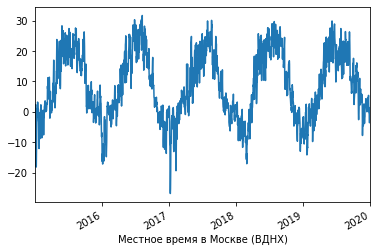

In [60]:
data['T'].plot()

In [61]:
data['T'].max()

31.7

In [62]:
data['T'].min()

-26.9

In [63]:
# Среднее значение
data['T'].mean()

8.772836801752456

In [64]:
# "95-й квантиль случайной величины равен 25.4" = вероятность того, что значение величины будет не выше 25.4 равна 95%

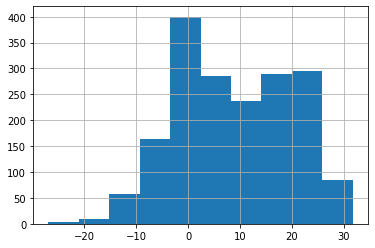

In [65]:
data['T'].hist()

In [66]:
quantile_95 = data['T'].quantile(0.95)

In [67]:
quantile_05 = data['T'].quantile(0.05)

In [68]:
len(data.index)

1826

In [69]:
[quantile_95] * len(data.index)

[25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000000003,
 25.575000000

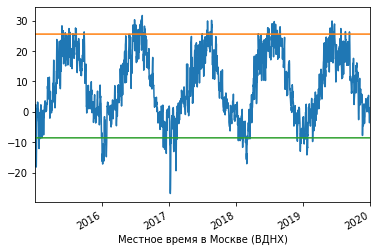

In [70]:
data['T'].plot()
plt.plot(data.index, [quantile_95] * len(data.index))
plt.plot(data.index, [quantile_05] * len(data.index))

In [71]:
# "Корреляция" величина, которая показывает, насколько две величины похожи в своем "поведении".
# Если X и Y растут или убывают одновременно, corr(X, Y) = 1
# Если X растет, Y убывает - corr(X, Y) = -1
# Если связи нет, corr(X, Y) = -0

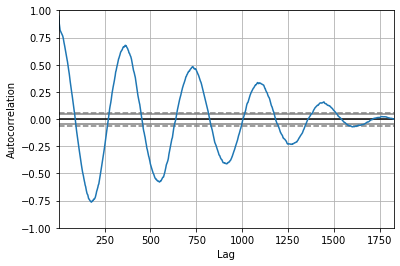

In [72]:
autocorrelation_plot(data['T'])

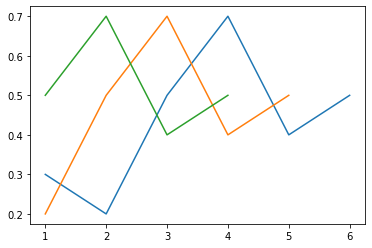

In [73]:
plt.plot([1, 2, 3, 4, 5, 6], [0.3, 0.20, 0.5, 0.7, 0.4, 0.5])
plt.plot([1, 2, 3, 4, 5, 6], [0.20, 0.5, 0.7, 0.4, 0.5, None])  # Lag = 1
plt.plot([1, 2, 3, 4, 5, 6], [ 0.5, 0.7, 0.4, 0.5, None, None]) # Lag = 2

In [74]:
# Тренд
regressor = LinearRegression()

In [75]:
x_range = list(range(0, len(data)))

In [76]:
pd.DataFrame(x_range)

,0
0,0
1,1
2,2
3,3
4,4
...,...
1821,1821
1822,1822
1823,1823
1824,1824


In [77]:
# регрессор подстроился 
regressor.fit(pd.DataFrame(x_range), data['T'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

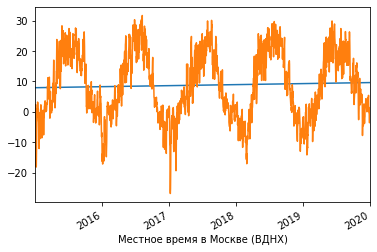

In [80]:
plt.plot(data.index, regressor.predict(pd.DataFrame(x_range)))
data['T'].plot()

In [ ]:
# ДЗ:
# взять данные из таблички 'IPG2211A2N.xls'
# построить аналитику аналогично проведенной 
# сделать выводы
# дедлайн 17:00 МСК